In [1]:
# Add the libraies path to python
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..\\python\\database'))
sys.path.append(os.path.join(os.getcwd(), '..\\python\\plots'))
sys.path.append(os.path.join(os.getcwd(), '..\\python\\charts'))

# Library imports
import database
import roster_plots
import roster_charts
import performance_plots
#import activity_plots
import score_plots
import draft_charts

In [2]:
# Constants to use in this notebook
season = "2023"
# Build the database for the season
db = database.database(season)

2023 Scores


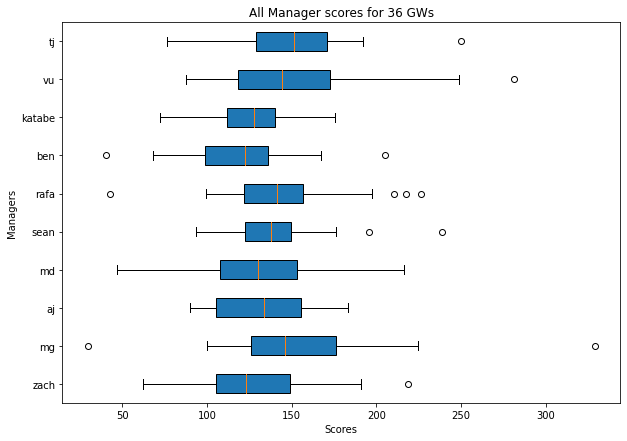

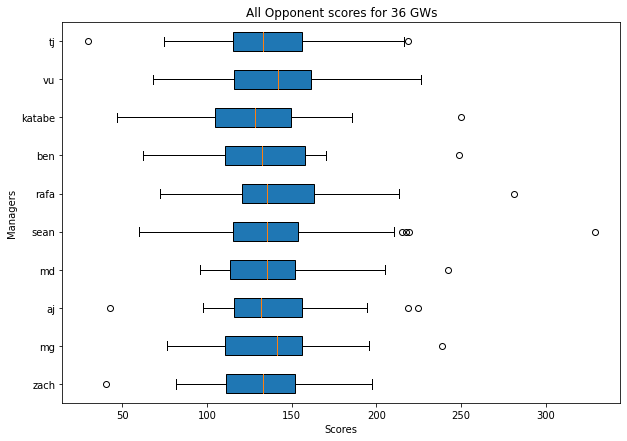

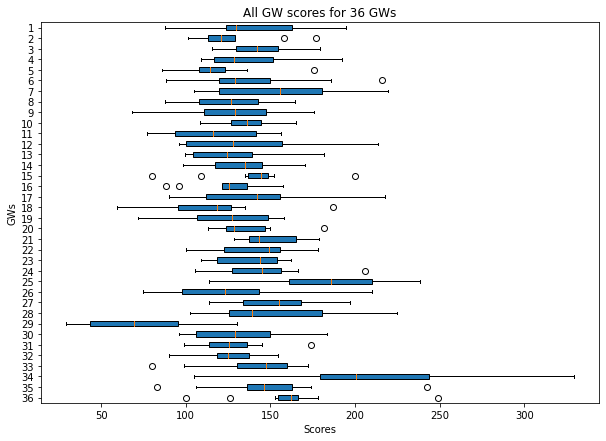

In [3]:
print(db.get_season(), "Scores")
score_plots.plot_manager_scores(db)
score_plots.plot_opponent_scores(db)
score_plots.plot_gw_scores(db)

2023 Performances


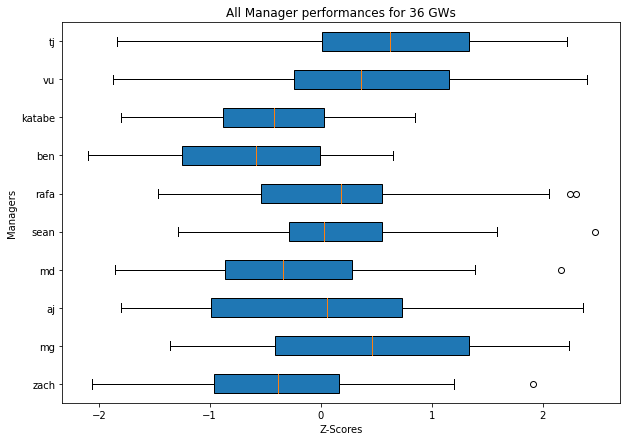

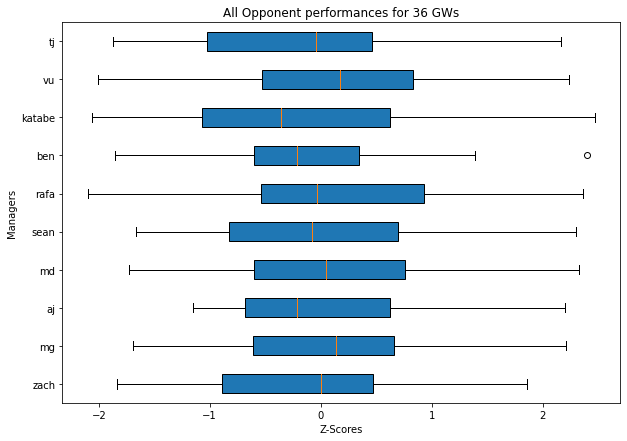

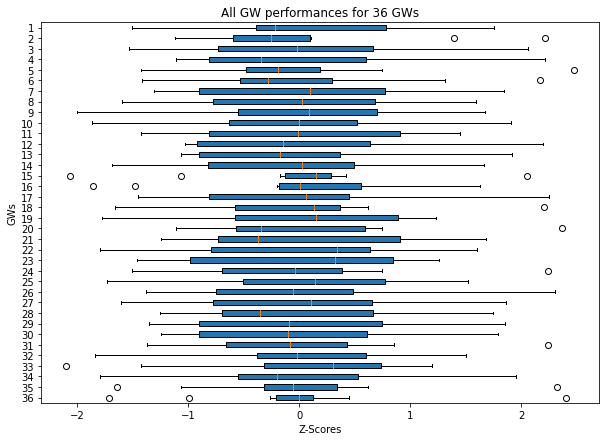

In [4]:
print(db.get_season(), "Performances")
performance_plots.plot_manager_performances(db)
performance_plots.plot_opponent_performances(db)
performance_plots.plot_gw_performances(db)

In [5]:
print(db.get_season(), "Roster Contributions")
# Chart the contributions for the season
roster_charts.chart_roster_contributions_for_players(db)
roster_charts.chart_roster_contributions_for_teams(db)
# Plot the contributions for the season
roster_plots.plot_roster_scores_by_position(db)
roster_plots.plot_roster_scores_by_team(db)

2023 Roster Contributions


TypeError: chart_roster_contributions_for_players() missing 1 required positional argument: 'wasDrafted'

In [ ]:
print(db.get_season(), "Positional Contributions")
# Chart the contributions for the season
roster_charts.chart_postitional_contributions(db)

In [ ]:
print(db.get_season(), "Team Contributions")
# Chart the contributions for the season
roster_charts.chart_team_contributions(db)

In [ ]:
print(db.get_season(), "Drafts")
# Plot the performances for the season
draft_charts.chart_draft_most_least_impact(db)
draft_charts.chart_draft_most_least_effective(db)
draft_charts.chart_draft_most_least_active(db)
draft_charts.chart_draft_impacts(db)

In [ ]:
print(db.get_season(), "Activity")
# Plot the manager activity for the season

import pandas as pd

number_of_gws = db.get_number_of_gws()
managers = db.get_managers()
manager_activity = dict()
for name in managers:
    manager_activity[name] = dict()
    
x_axis = list()
for gw_index in range(number_of_gws):
    gw = gw_index + 1
    x_axis.append(gw)
    for name in managers:
        
        manager_lineup_changes = db.get_manager_activity_reader(name).get_lineup_changes()
        manager_lineup_changes_for_gw = 0
        if(gw in manager_lineup_changes.keys()):
            manager_lineup_changes_for_gw = len(manager_lineup_changes[gw])
        
        manager_lineup_changes_for_gw = 0
        if(gw in manager_lineup_changes.keys()):
            manager_lineup_changes_for_gw = len(manager_lineup_changes[gw])
            
        if(gw > 1):
            prev_manager_lineup_changes_for_gw = manager_activity[name][gw - 1]
            manager_activity[name][gw] = manager_lineup_changes_for_gw + prev_manager_lineup_changes_for_gw
        else:
            manager_activity[name][gw] = manager_lineup_changes_for_gw
            
        # manager_activity[name][gw] = manager_lineup_changes_for_gw
        
    
df = pd.DataFrame(data=manager_activity)
df.head()    
df.plot(title = db.get_season() + ' Cumulative Manager Lineup Changes');

In [ ]:
print(db.get_season(), "Activity")
# Plot the manager activity for the season

import pandas as pd

number_of_gws = db.get_number_of_gws()
managers = db.get_managers()
manager_activity = dict()
for name in managers:
    manager_activity[name] = dict()
    
x_axis = list()
for gw_index in range(number_of_gws):
    gw = gw_index + 1
    x_axis.append(gw)
    for name in managers:
        
        manager_lineup_changes = db.get_manager_activity_reader(name).get_claims_drops()
        manager_lineup_changes_for_gw = 0
        if(gw in manager_lineup_changes.keys()):
            manager_lineup_changes_for_gw = len(manager_lineup_changes[gw])
        
        manager_lineup_changes_for_gw = 0
        if(gw in manager_lineup_changes.keys()):
            manager_lineup_changes_for_gw = len(manager_lineup_changes[gw])
            
        if(gw > 1):
            prev_manager_lineup_changes_for_gw = manager_activity[name][gw - 1]
            manager_activity[name][gw] = manager_lineup_changes_for_gw + prev_manager_lineup_changes_for_gw
        else:
            manager_activity[name][gw] = manager_lineup_changes_for_gw
            
        # manager_activity[name][gw] = manager_lineup_changes_for_gw
        
    
df = pd.DataFrame(data=manager_activity)
df.head()    
df.plot(title = db.get_season() + ' Cumulative Manager Claim / Drops');